## Practice: spatial data analysis
We are going to write some code in our jupyter notebook to practice. We'll start by importing packages, reading in a dataset, and plotting it. 

In [3]:
# import packages 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
# read in data
data_path = "wf_conus_2015_2020.parquet"
zctas_path = "ca_zcta_shp.parquet"

wfs = gpd.read_parquet(data_path)
zctas = gpd.read_parquet(zctas_path)

In [5]:
zctas.head()

,zcta,geometry
0,93308,"MULTIPOLYGON (((93799.77 -268576.634, 94082.32..."
1,93592,"MULTIPOLYGON (((237663.11 -239836.156, 238165...."
2,93060,"POLYGON ((67209.256 -393119.506, 67335.281 -39..."
3,93960,"POLYGON ((-139887.628 -167474.648, -139017.109..."
4,93235,"POLYGON ((68638.016 -181032.336, 68649.846 -18..."


<Axes: >

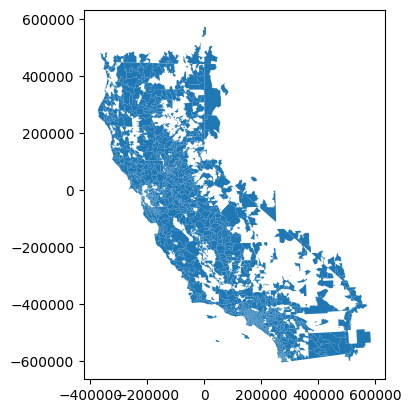

In [6]:
zctas.plot()

In [7]:
zctas.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
# lets rename a variable
zctas = zctas.rename(columns={"zcta": "zcta_new"})
zctas

,zcta_new,geometry
0,93308,"MULTIPOLYGON (((93799.77 -268576.634, 94082.32..."
1,93592,"MULTIPOLYGON (((237663.11 -239836.156, 238165...."
2,93060,"POLYGON ((67209.256 -393119.506, 67335.281 -39..."
3,93960,"POLYGON ((-139887.628 -167474.648, -139017.109..."
4,93235,"POLYGON ((68638.016 -181032.336, 68649.846 -18..."
...,...,...
1803,86403,"POLYGON ((515202.718 -379651.002, 515483.375 -..."
1804,92570,"POLYGON ((235759.573 -466074.065, 235799.81 -4..."
1805,90010,"MULTIPOLYGON (((157690.282 -437682.106, 157849..."
1806,93263,"POLYGON ((50024.71 -279457.516, 50815.857 -279..."


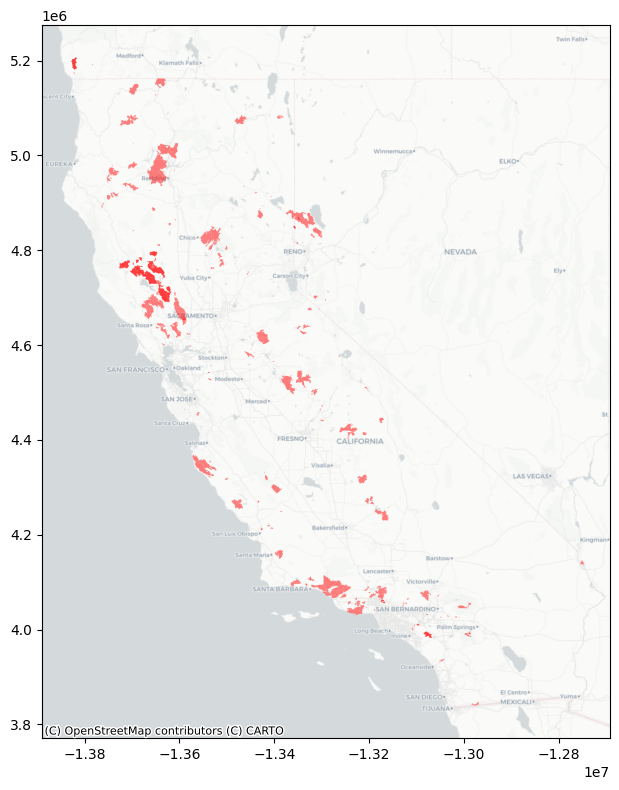

In [9]:
# lets plot wfs in CA

# first convert to crs of a basemap so we can plot everything together
wfs = wfs.to_crs('EPSG:3857')
zctas = zctas.to_crs('EPSG:3857')

# overlay wfs and california zctas to get wfs in CA 
wfs_ca = gpd.overlay(wfs, zctas)

# set up for your plot
fig, ax = plt.subplots(figsize=(8,8))

# plot the fires
wfs_ca.plot(ax=ax, alpha=0.5, color='red')

# add a nice basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# print plot
plt.tight_layout()
plt.show()

## Resources

### Beginner tutorials
- [Beginner Python tutorial](https://www.udemy.com/course/pythonforbeginnersintro)
- [Another beginner tutorial](https://www.datacamp.com/courses/intro-to-python-for-data-science)

### Cheat sheet
#### Set up environment: 
1. `conda create -n name-of-env python=3.10`
2. `conda activate name-of-env`
3. `pip install package-name`
4. `jupyter lab .`

#### Jupyter notebook and python shortcuts from today
1. `shift + enter` to run a cell
2. `import package-name` to import a package
3. `df = pd.read_csv('file.csv')` to read in a csv file
4. `df.head()` to see the first few rows of a dataframe
5. `df.plot()` to plot a dataframe
6. `df.to_csv('file.csv')` to save a dataframe as a csv
7. `gdf = gpd.read_parquet('file.parquet')` to read in a geoparquet
8. `gdf = gpd.read_file('file.geojson')` to read in a geojson
9. `gdf.head()` to see the first few rows of a geodataframe
10. `gdf.plot()` to plot a geodataframe
11. `gdf.to_parquet('file.parquet')` to save a geodataframe as a parquet
12. `gdf.to_file('file.geojson', driver='GeoJSON')` to save a geodataframe as a geojson  
<br> 
This is just a start and the goal is to get you comfortable with running things that you are given in python. When you get stuck, many Python packages have excellent documentation so go there first! And as always, please don't hesitate to reach out if you have questions or need help!